# Bayesian Optimization

### "grid search, random search보다 효율적인 방식"

## 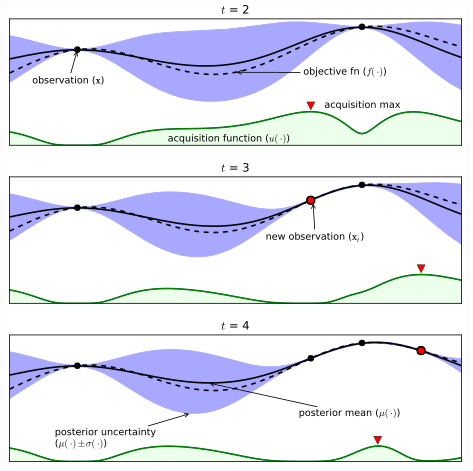

### 1. Surrogate Model
- 현재까지 조사된 (x,f(x))를 바탕으로 목적 함수의 형태에 대해 확률적 추정을 하는 모델

### 2. Acquisition Function
- Surrogate Model이 추정한 결과를 토대로, 다음에 함수 값을 조사할 x를 추천해주는 함수
- Expected Improvement (EI)를 많이 사용! ( exploitation & exploration 모두 고려 )

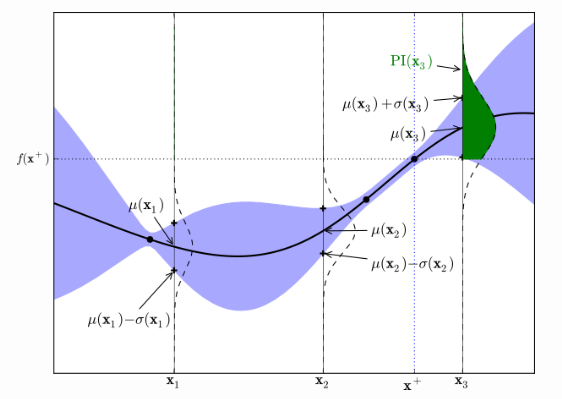

### 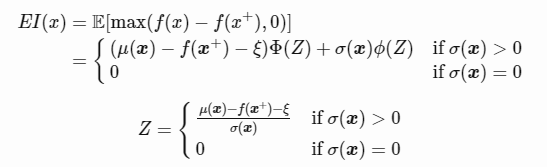

 - Φ와 ϕ는 각각 표준 정규분포의 cdf & pdf
 - ξ는 exploration과 exploitation를 조절해주는 파라미터 ( 클수록 explore, 작을수록 exploit )

## 1. Specify function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def black_box_func(x1,x2):
    y = -x1**2 - (x2-1)**2 +1
    return y

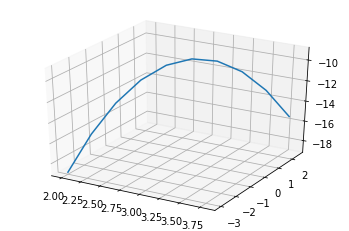

In [3]:
_x1 = np.arange(2, 4,0.2)
_x2 = np.arange(-3, 3,0.6)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs=_x1,ys= _x2,zs=black_box_func(_x1,_x2))
plt.show()

## 2. Bayesian Optimizer

In [4]:
from bayes_opt import BayesianOptimization

In [5]:
pbounds = {'x1':(2,4),'x2':(-3,3)}

- f : function to optimize
- pbounds : bounded region of parameter

In [6]:
opt = BayesianOptimization(f=black_box_func,
                          pbounds=pbounds,
                          random_state=42)

- init_points : # of steps of 'random exploration'
- n_iter : how many steps of B.O to perform

In [7]:
opt.maximize(init_points=2,n_iter=6)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  1        | -9.462    |  2.749    |  2.704    |
|  2        | -11.17    |  3.464    |  0.592    |
|  3        | -8.96     |  2.687    |  2.655    |
|  4        | -7.463    |  2.493    |  2.5      |
|  5        | -6.314    |  2.232    |  2.527    |
|  6        | -5.09     |  2.091    |  2.31     |
|  7        | -4.196    |  2.0      |  2.094    |
|  8        | -4.265    |  2.117    |  1.886    |


## 3. Result

In [8]:
opt.max

{'target': -4.19620594725125, 'params': {'x1': 2.0, 'x2': 2.093712003797732}}

In [11]:
for i,res in enumerate(opt.res):
    print("Iteration {} : {}".format(i,res))

Iteration 0 : {'target': -9.462032372457276, 'params': {'x1': 2.749080237694725, 'x2': 2.704285838459497}}
Iteration 1 : {'target': -11.165716121667243, 'params': {'x1': 3.46398788362281, 'x2': 0.5919509051822196}}
Iteration 2 : {'target': -8.959888706710299, 'params': {'x1': 2.6871694683465264, 'x2': 2.6549951525900446}}
Iteration 3 : {'target': -7.46326815316198, 'params': {'x1': 2.492593351125759, 'x2': 2.500082177444169}}
Iteration 4 : {'target': -6.313691854139784, 'params': {'x1': 2.2323409019157396, 'x2': 2.526547068312604}}
Iteration 5 : {'target': -5.090474579866656, 'params': {'x1': 2.0914802235002417, 'x2': 2.31003246317564}}
Iteration 6 : {'target': -4.19620594725125, 'params': {'x1': 2.0, 'x2': 2.093712003797732}}
Iteration 7 : {'target': -4.264963418495081, 'params': {'x1': 2.1165566030879193, 'x2': 1.886087785955776}}


In [10]:
print('Target Value :', opt.max['target'])
print('Parameters :', opt.max['params'])

Target Value : -4.19620594725125
Parameters : {'x1': 2.0, 'x2': 2.093712003797732}


### iteration을 더 많이 했다면...

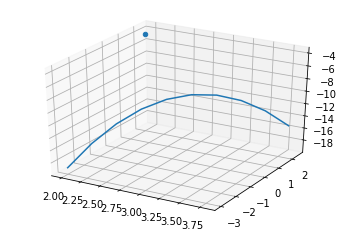

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs=_x1,ys= _x2,zs=black_box_func(_x1,_x2))
ax.scatter(xs=opt.max['params']['x1'],
        ys=opt.max['params']['x2'],
        zs=opt.max['target'],s=20)
plt.show()

## 4. Changing Bounds

In [12]:
opt.set_bounds(new_bounds={'x':(-2,3)})

- 위에서 찾은 결과값에 이어서 진행 ( reset X )

In [13]:
opt.maximize(init_points=0,n_iter=4)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  9        | -3.471    |  2.0      |  1.686    |
|  10       | -3.152    |  2.0      |  1.39     |
|  11       | -3.007    |  2.0      |  1.081    |
|  12       | -3.959    |  2.222    |  1.149    |


### ( specify points to be probed )

In [14]:
# 1st method
opt.probe(params={'x1':0.5, 'x2':0.7},lazy=True)

# 2nd method
opt.probe(params=[-0.3, 0.1],lazy=True)

In [15]:
opt.maximize(init_points=0,n_iter=0)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  13       |  0.66     |  0.5      |  0.7      |
|  14       |  0.1      | -0.3      |  0.1      |
